In [25]:
import pandas as pd

df = pd.read_csv('../data/response_tasks_1.csv')


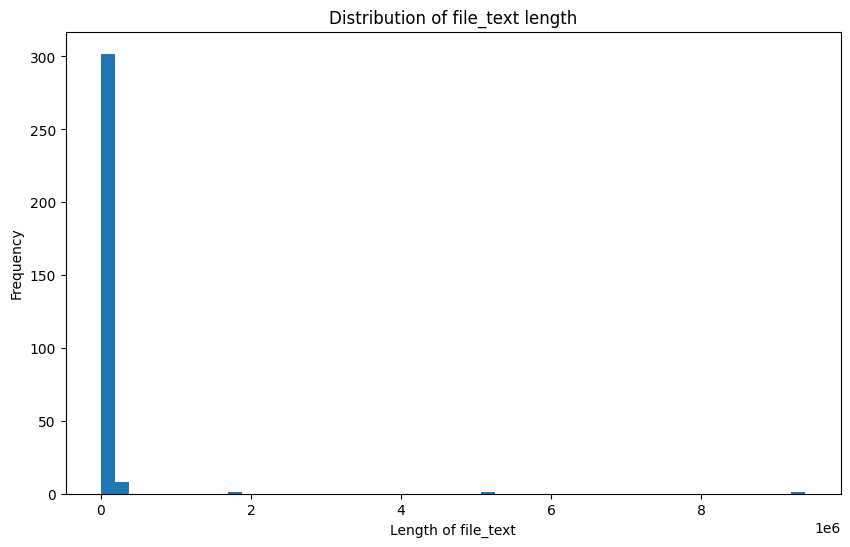

Percentage of rows with NaN in communication column: 0.0%


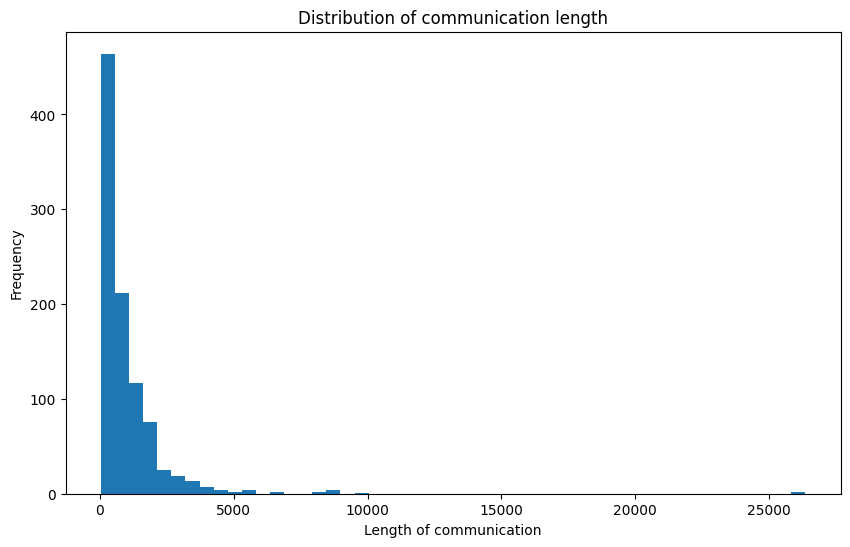

Percentage of rows with communication field less than 3000 characters: 95.38784067085953%


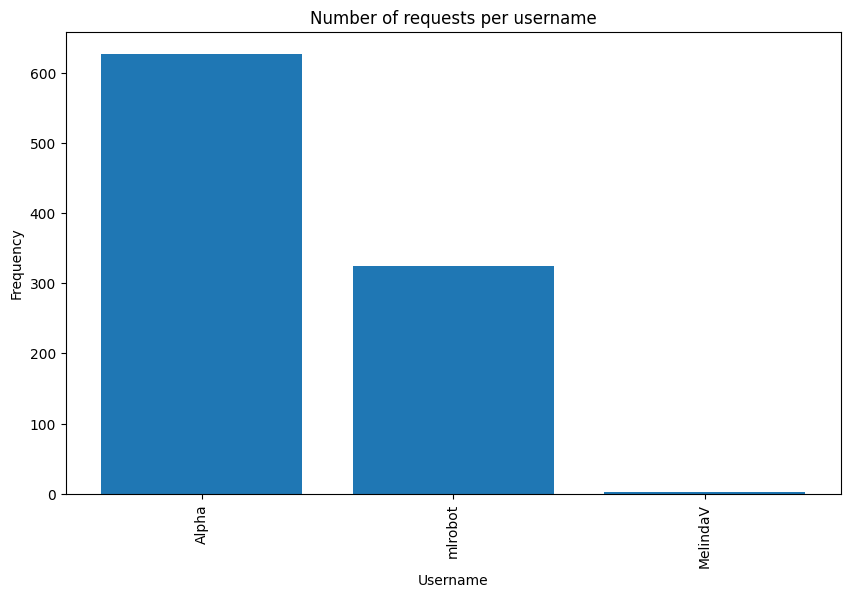

In [30]:
import matplotlib.pyplot as plt

df['file_text_length'] = df['file_text'].str.len()
plt.figure(figsize=(10,6))

plt.hist(df['file_text_length'].dropna(), bins=50)
plt.title('Distribution of file_text length')
plt.xlabel('Length of file_text')
plt.ylabel('Frequency')
plt.show()

nan_communication_rows = df['communication'].isna().sum()
total_rows = df.shape[0]
percent_nan_communication = (nan_communication_rows / total_rows) * 100
print(f"Percentage of rows with NaN in communication column: {percent_nan_communication}%")



df['communication_length'] = df['communication'].str.len()
df = df.dropna(subset=['communication_length'])

plt.figure(figsize=(10,6))


plt.hist(df['communication_length'].dropna(), bins=50)
plt.title('Distribution of communication length')
plt.xlabel('Length of communication')
plt.ylabel('Frequency')
plt.show()

x = 3000
percent_less_than_x = (df[df['communication_length'] < x].shape[0] / df.shape[0]) * 100
print(f"Percentage of rows with communication field less than {x} characters: {percent_less_than_x}%")


username_counts = df['username'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(username_counts.index, username_counts.values)
plt.title('Number of requests per username')
plt.xlabel('Username')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()







All unique 'status' values: ['no_docs' 'processed' 'payment' 'done' 'fix' 'abandoned' 'appealing'
 'rejected' 'partial']
Empty DataFrame
Columns: [tid, cid, url, username, communication, file_text, status, tracking_number, date_estimate, price, file_text_length, communication_length]
Index: []


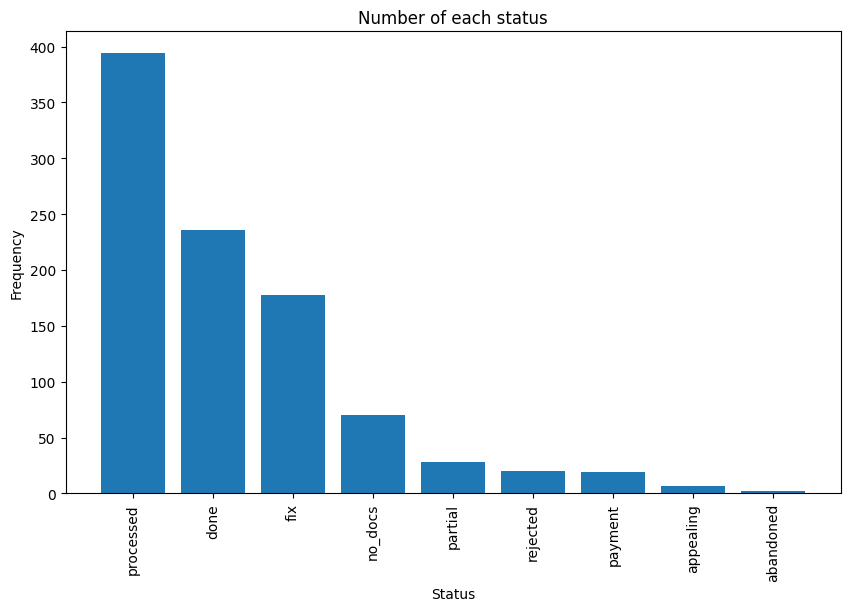

In [27]:
unique_statuses = df['status'].unique()
print(f"All unique 'status' values: {unique_statuses}")

def map_status(status):
    status_mapping = {
        'no_docs': 'NO_DOCS',
        'processed': 'PROCESSED',
        'payment': 'PAYMENT',
        'done': 'DONE',
        'fix': 'FIX',
        'abandoned': 'INDETERMINATE',
        'appealing': 'INDETERMINATE',
        'rejected': 'REJECTED',
        'partial': 'PARTIAL'
    }
    return status_mapping.get(status, 'INDETERMINATE')


status_counts = df['status'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(status_counts.index, status_counts.values)
plt.title('Number of each status')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

df['status_new'] = df['status'].apply(map_status)




In [29]:
import numpy as np
import json

np.random.seed(0)

# Get unique statuses
unique_statuses = df['status'].unique()

# Initialize an empty dataframe for the samples
df_sample = pd.DataFrame()

# Loop through each unique status and sample up to 10 records
for status in unique_statuses:
    df_status = df[df['status'] == status]
    df_sample = pd.concat([df_sample, df_status.sample(min(len(df_status), 10))])

df_sample

list_of_objects = df_sample.to_dict('records')
list_of_objects

with open('../data/data.json', 'w') as f:
    json.dump(list_of_objects, f)

